In [4]:
!ls
# !conda activate openmmlab


checkpoints			MANIFEST.in	       requirements
CITATION.cff			mask_rcnn.py	       requirements.txt
config_cascade_mask_rcnn_50.py	mmdet		       resources
configs				model-index.yml        setup.cfg
data				my_install_readme.txt  setup.py
demo				my_test.ipynb	       test_config_bug.py
docker				my_test.py	       tests
docs				pytest.ini	       tools
docs_zh-CN			README.md	       VRDL_HW3_config.py
LICENSE				README_zh-CN.md        work_dirs


load checkpoint from local path: ./work_dirs/config_cascade_mask_rcnn_50/epoch_20.pth


/home/eritup45/NYCU/VRDL/hw3_instance_segmentation/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


([array([[6.84893433e+02, 5.70445900e+01, 7.11535095e+02, 7.77623749e+01,
        9.80801523e-01],
       [4.97792969e+02, 4.34324066e+02, 5.50260315e+02, 4.66756104e+02,
        9.74072933e-01],
       [5.10735138e+02, 7.79225708e+02, 5.42461060e+02, 8.04058594e+02,
        9.68347132e-01],
       [5.18911560e+02, 1.98577606e+02, 5.59007019e+02, 2.32492905e+02,
        9.64098752e-01],
       [4.62735565e+02, 5.79924072e+02, 4.86337616e+02, 6.02355957e+02,
        9.62444246e-01],
       [3.14189758e+02, 9.23932007e+02, 3.52093262e+02, 9.54292908e+02,
        9.62207079e-01],
       [6.44825378e+02, 1.16645042e+02, 6.81266113e+02, 1.49777756e+02,
        9.61461663e-01],
       [2.68895569e+02, 8.13838135e+02, 3.00722809e+02, 8.35933289e+02,
        9.59668040e-01],
       [5.94713867e+02, 9.51097778e+02, 6.16610779e+02, 9.76713501e+02,
        9.55191493e-01],
       [9.56474731e+02, 9.78556274e+02, 9.88663330e+02, 9.99974121e+02,
        9.49606597e-01],
       [8.26301086e+02, 1.22

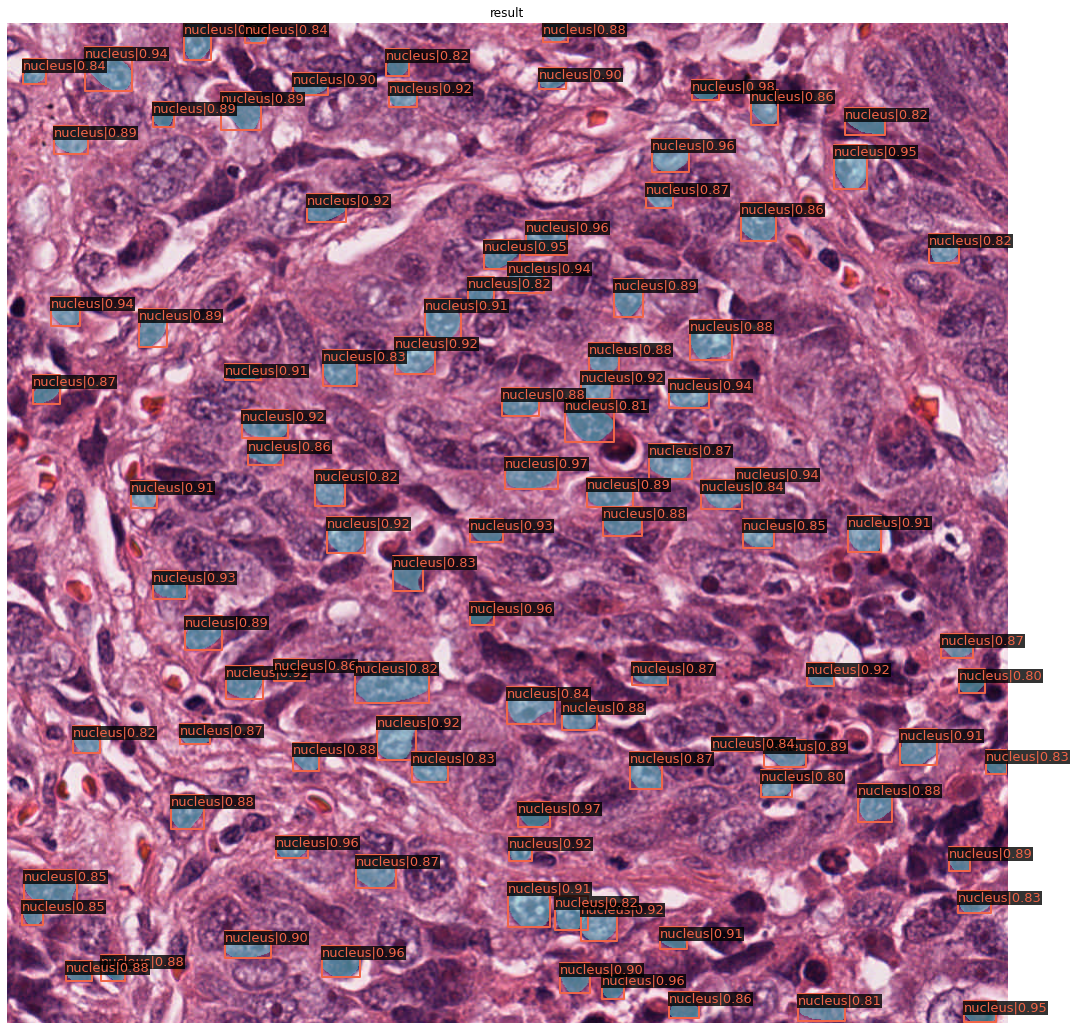

In [10]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

config_file = './config_cascade_mask_rcnn_50.py'
# 1212 mAP:0.06
checkpoint_file = './work_dirs/1212_ep40_cascade_mask_rcnn/epoch_1.pth'
device = 'cuda:0'
# init a detector
model = init_detector(config_file, checkpoint_file, device=device)
# inference the demo image
pic = './demo/demo_test.png'
result = inference_detector(model, pic)

show_result_pyplot(model, pic, result)


In [9]:
# Test shape
import cv2
img = cv2.imread(pic)
h, w, c = img.shape
print(h,w,c)

1000 1000 3


In [ ]:
import json
import cv2

data = []
images=[
    'TCGA-A7-A13E-01Z-00-DX1.png',
    'TCGA-50-5931-01Z-00-DX1.png',
    'TCGA-G2-A2EK-01A-02-TSB.png',
    'TCGA-AY-A8YK-01A-01-TS1.png',
    'TCGA-G9-6336-01Z-00-DX1.png',
    'TCGA-G9-6348-01Z-00-DX1.png',
]
config_file = './config_cascade_mask_rcnn_50.py'
checkpoint_file = './work_dirs/config_cascade_mask_rcnn_50/epoch_20.pth'
device = 'cuda:0'
model = init_detector(config_file, checkpoint_file, device=device)
result = inference_detector(model, pic)

for i in range(1, len(images)):
    image=cv2.imread('test2017/'+images[i])





In [ ]:
import json
import cv2

data = []
images=[
'TCGA-A7-A13E-01Z-00-DX1.png',
'TCGA-50-5931-01Z-00-DX1.png',
'TCGA-G2-A2EK-01A-02-TSB.png',
'TCGA-AY-A8YK-01A-01-TS1.png',
'TCGA-G9-6336-01Z-00-DX1.png',
'TCGA-G9-6348-01Z-00-DX1.png',
]


for i in range(1, len(images)):
  image=cv2.imread('test2017/'+images[i])
  category_id=1
  seglist=[]
  boxlist=[]
  scorelist=[]
  outputs = predictor(image)
  v = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get("val_2019"), scale=0.6, instance_mode=ColorMode.IMAGE_BW)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, :])

  for score in (outputs['instances'].scores):
    scorelist.append(float(score))
  masks = (outputs['instances'].pred_masks.cpu())
  for mask in masks:
    mask = mask.long()
    mask = mask.numpy()
    mmask = cv2.normalize(mask, None, 0, 255, cv2.NORM_MINMAX)
    m=np.asfortranarray(np.uint8(mmask))
    seg=encode(m)
    # print(seg)
    segcounts=seg["counts"].decode("UTF-8")
    tmpseg = {
      "size": seg["size"],
      "counts": segcounts,
    }
    seglist.append(tmpseg)
    box=toBbox(seg)
    tmpb=[]
    for b in box:
      tmpb.append(int(b))
    boxlist.append(tmpb)
  print(len(boxlist))
  for i in range(len(boxlist)):
    k = {
        "image_id": int(image_id),
        "bbox": boxlist[i],
        "score": scorelist[i],
        "category_id": int(category_id),
        "segmentation": seglist[i],
    }
    data.append(k)

with open("answer.json", "w") as outfile:
  json.dump(data, outfile, indent=4)